In [0]:
# Import flights.csv, airlines.csv,airports.csv and do the following exercises using Spark SQL:
# 1. Find out which airports when treated as Origin have the smallest and the largest Departure delays.
# 2. Create a list of U.S. States with the number of airports that each of them has in descending order. Show this on a map of the U.S. (Hint: Use: a choropleth map. States are listed as USPS Abbreviations)
# 3. Create a list containing: DATE, NUM_OF_FLIGHTS, MAX_ARRIVAL_DELAY, AVG_ARRIVAL_DELAY. Please provide the date (from FlightDate) in the following format i.e. 2018-01-10. The maximum and Average delays should be provided in minutes but rounded to 2 digits after the decimal point.
# 4. Show on a bar chart the number of flights per Carrier. Use the full name of the airline (from airlines.csv).
# 5. Show on a pie chart the number of flights per Carrier but this time only show the individual results for the top 10 Carriers (measured by number of flights) and the rest show as one OTHER element. This will probably require the use of Temporary Views (Create or Replace Temporary View new_view as Select * from XXX). If it is done correctly OTHER should account for 16% of all flights.

In [0]:
%python

import matplotlib.pyplot as plt
import pandas as pd
import plotly
import plotly.express as px
from pyspark.sql.functions import *

# File location and type
files_location = {
    "flights": "/FileStore/tables/flights_csv.gz",
    "airlines": "/FileStore/tables/airlines.csv",
    "airports": "/FileStore/tables/airports.csv",
}

file_type = "csv"

# CSV options
infer_schema = "false"
first_row_is_header = "true"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df_flights = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(files_location["flights"])

df_airlines = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(files_location["airlines"])

df_airports = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(files_location["airports"])

display(df_flights)
display(df_airlines)
display(df_airports)

df_flights.createOrReplaceTempView("Flights")
df_airlines.createOrReplaceTempView("Airlines")
df_airports.createOrReplaceTempView("Airports")

Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,UniqueCarrier,AirlineID,Carrier,TailNum,FlightNum,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,_c109
2018,1,1,16,2,2018-01-16,AA,19805,AA,N128AN,228,12892,1289206,32575,LAX,"Los Angeles, CA",CA,06,California,91,12173,1217303,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,2011,2010,-1.00,0.00,0.00,-1,2000-2059,24.00,2034,2358,7.00,0029,0005,-24.00,0.00,0.00,-2,0001-0559,0.00,null,0.00,378.00,355.00,324.00,1.00,2556.00,11,null,null,null,null,null,null,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2018,1,1,17,3,2018-01-17,AA,19805,AA,N128AN,228,12892,1289206,32575,LAX,"Los Angeles, CA",CA,06,California,91,12173,1217303,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,2011,2003,-8.00,0.00,0.00,-1,2000-2059,18.00,2021,2348,5.00,0029,2353,-36.00,0.00,0.00,-2,0001-0559,0.00,null,0.00,378.00,350.00,327.00,1.00,2556.00,11,null,null,null,null,null,null,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2018,1,1,18,4,2018-01-18,AA,19805,AA,N121AN,228,12892,1289206,32575,LAX,"Los Angeles, CA",CA,06,California,91,12173,1217303,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,2011,2008,-3.00,0.00,0.00,-1,2000-2059,14.00,2022,0006,6.00,0029,0012,-17.00,0.00,0.00,-2,0001-0559,0.00,null,0.00,378.00,364.00,344.00,1.00,2556.00,11,null,null,null,null,null,null,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2018,1,1,19,5,2018-01-19,AA,19805,AA,N129AA,228,12892,1289206,32575,LAX,"Los Angeles, CA",CA,06,California,91,12173,1217303,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,2011,2010,-1.00,0.00,0.00,-1,2000-2059,17.00,2027,2352,3.00,0029,2355,-34.00,0.00,0.00,-2,0001-0559,0.00,null,0.00,378.00,345.00,325.00,1.00,2556.00,11,null,null,null,null,null,null,null,null,0,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2018,1,1,20,6,2018-01-20,AA,19805,AA,N133AN,228,12892,1289206,32575,LAX,"Los Angeles, CA",CA,06,California,91,12173,1217303,32134,HNL,"Honolulu, HI",HI,15,Hawaii,2,2011,2001,-10.00,0.00,0.00,-1,2000-2059,17.00,2018,2352,5.00,0029,2357,-32.00,0.00,0.0

IATA_CODE,AIRLINE
UA,United Air Lines Inc.
AA,American Airlines Inc.
US,US Airways Inc.
F9,Frontier Airlines Inc.
B6,JetBlue Airways
OO,Skywest Airlines Inc.
AS,Alaska Airlines Inc.
NK,Spirit Air Lines
WN,Southwest Airlines Co.
DL,Delta Air Lines Inc.


IATA_CODE,AIRPORT,CITY,STATE,COUNTRY,LATITUDE,LONGITUDE
ABE,Lehigh Valley International Airport,Allentown,PA,USA,40.65236,-75.44040
ABI,Abilene Regional Airport,Abilene,TX,USA,32.41132,-99.68190
ABQ,Albuquerque International Sunport,Albuquerque,NM,USA,35.04022,-106.60919
ABR,Aberdeen Regional Airport,Aberdeen,SD,USA,45.44906,-98.42183
ABY,Southwest Georgia Regional Airport,Albany,GA,USA,31.53552,-84.19447
ACK,Nantucket Memorial Airport,Nantucket,MA,USA,41.25305,-70.06018
ACT,Waco Regional Airport,Waco,TX,USA,31.61129,-97.23052
ACV,Arcata Airport,Arcata/Eureka,CA,USA,40.97812,-124.10862
ACY,Atlantic City International Airport,Atlantic City,NJ,USA,39.45758,-74.57717
ADK,Adak Airport,Adak,AK,USA,51.87796,-176.64603


In [0]:
%sql
-- Task 1
Select distinct airports.AIRPORT 
From flights Left Join airports  
On flights.Origin = airports.IATA_CODE
Where flights.DepDelay = (Select min(DepDelay) as min_delay From flights)
Or flights.DepDelay = (Select max(DepDelay) as max_delay From flights)

AIRPORT
Melbourne International Airport
San Diego International Airport (Lindbergh Field)
Eppley Airfield
Kahului Airport
Austin-Bergstrom International Airport
Port Columbus International Airport
Waco Regional Airport
Sacramento International Airport
Brownsville/South Padre Island International Airport
Meadows Field


In [0]:
task_2 = spark.sql(""" 
    Select state, Count(airport) as number_of_airports
    From Airports Group by state 
    Order by number_of_airports desc 
""")

data = [row["state"] for row in task_2.collect()]
data_color = [row["number_of_airports"] for row in task_2.collect()]


fig = px.choropleth(locations=data,
                    locationmode="USA-states", color=data_color, scope="usa")
 
fig.show()

In [0]:
%sql
-- Task 3
Select date(FlightDate), Count(*) as NUM_OF_FLIGHTS, Max(ArrDelayMinutes) as MAX_ARRIVAL_DELAY, Round(AVG(ArrDelayMinutes),2) as AVG_ARRIVAL_DELAY
From flights
Group by date(FlightDate)

FlightDate,NUM_OF_FLIGHTS,MAX_ARRIVAL_DELAY,AVG_ARRIVAL_DELAY
2018-01-01,17914,99.00,21.04
2018-01-02,19881,99.00,18.08
2018-01-03,19193,99.00,14.17
2018-01-04,19242,99.00,11.19
2018-01-05,19283,99.00,20.33
2018-01-06,15966,99.00,15.79
2018-01-07,19081,993.00,18.53
2018-01-08,19287,99.00,20.88
2018-01-09,18270,996.00,14.67
2018-01-10,18789,99.00,8.74


Out[117]: <AxesSubplot:>

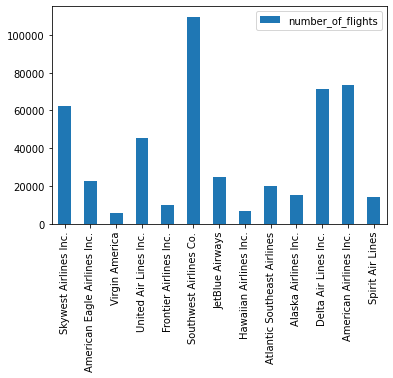

In [0]:
task_4 = spark.sql("""
    Select a.AIRLINE, Count(*) as number_of_flights
    From flights f Join airlines a 
    On f.Carrier = a.IATA_CODE
    Group by a.AIRLINE
""")

airlines = [row["AIRLINE"] for row in task_4.collect()]
number_of_flights = [row["number_of_flights"] for row in task_4.collect()]

df = pd.DataFrame({"number_of_flights": number_of_flights}, index=airlines)

df.plot.bar()

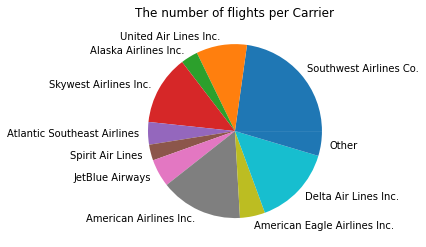

In [0]:
task_5 = spark.sql("""
    With top_10_airlines(
        Select a.AIRLINE, Count(*) as number_of_flights
        From flights f Join airlines a 
        On f.Carrier = a.IATA_CODE
        Group by a.AIRLINE
        Order by number_of_flights Desc 
        Limit 10
    ),
    others_airlines(
        Select a.AIRLINE, Count(*) as number_of_flights
        From flights f Join airlines a 
        On f.Carrier = a.IATA_CODE
        Where a.AIRLINE not in (Select AIRLINE From top_10_airlines)
        Group by a.AIRLINE
    )
    Select * From top_10_airlines 
    Union 
    Select 'Other' as AIRLINE, Sum(number_of_flights) as number_of_flights From others_airlines 
""")

airlines = [row["AIRLINE"] for row in task_5.collect()]
number_of_flights = [int(row["number_of_flights"]) for row in task_5.collect()]

plt.pie(number_of_flights, labels=airlines)
plt.title('The number of flights per Carrier')
plt.show()